In [1]:
%pylab inline
import numpy as np
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target'].astype(float)
X_train, y_train = X[:50000], y[:50000]
X_test, y_test = X[50000:], y[50000:]

5.0

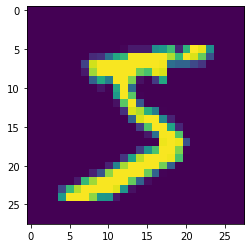

In [5]:
imshow(X_train[0].reshape(28, 28))
y[0]

In [7]:
# model

import torch
import torch.nn as nn

class NurNet(nn.Module):
    def __init__(self):
        super(NurNet, self).__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

loss 0.17, acc 0.96: 100%|██████████| 1000/1000 [00:05<00:00, 184.26it/s]


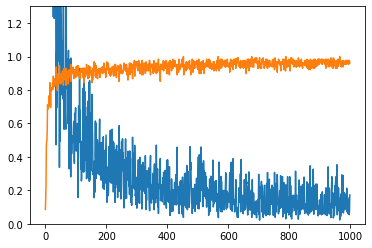

In [83]:
# training

model = NurNet()

BS = 128
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

losses, accuracies = [], []

t = trange(1000)
for i in t:
    sample = np.random.randint(0, X_train.shape[0], size=BS)
    X = torch.tensor(X_train[sample]).float()
    y = torch.tensor(y_train[sample]).long()
    optim.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == y).float().mean()
    loss = loss_function(out, y)
    loss.backward()
    optim.step()
    
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description('loss %.2f, acc %.2f' % (loss, accuracy))

plt.ylim(0, 1.3)
plot(losses)
plot(accuracies)

In [84]:
# eval

test_out = model(torch.tensor(X_test).float())

y_test_preds = torch.argmax(test_out, dim=1)
accuracy = (y_test_preds == y_test).float().mean()

print(accuracy.item())

0.9534000158309937
